# SART Data Visualization for Water Dimer - Final Version

This notebook provides tools for visualizing SART (Symmetry-Adapted Perturbation Theory) energy data for water dimer systems.

## Features:
- Plot total interaction energy vs distance
- Visualize energy components (electrostatic, exchange, deformation, induction)
- Compare different basis sets side-by-side
- Simplified energy breakdown formulations (6 separate plots)
- Interactive plots with customizable units
- Improved induction energy plots including total deformation energy

## Energy Breakdown Formulations:
1. **V1**: E_int = dEA + dEB + E_LM + E_elst + E_exch
2. **V2**: E_int = E_def,tot[A] + E_def,tot[B] + E_elst,rel + E_exch,rel + E1_elst + E1_exch
3. **V3**: E_int = E_def,tot[A] + E_def,tot[B] + E_ind,inter + E1_elst + E1_exch

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 12

In [2]:
# Energy unit conversion factors (from Hartree)
UNIT_CONVERSIONS = {
    'Hartree': 1.0,
    'mH': 1000.0,
    'kcal/mol': 627.5094740630557,
    'kJ/mol': 2625.4996394798254,
    'meV': 27211.386245988
}

def convert_energy(energy_hartree, target_unit='kJ/mol'):
    """
    Convert energy from Hartree to specified unit.
    
    Parameters:
    energy_hartree: float or array-like, energy in Hartree
    target_unit: str, target unit for conversion
    
    Returns:
    Converted energy value(s)
    """
    if target_unit not in UNIT_CONVERSIONS:
        raise ValueError(f"Unit {target_unit} not supported. Available units: {list(UNIT_CONVERSIONS.keys())}")
    
    return energy_hartree * UNIT_CONVERSIONS[target_unit]

In [3]:
# Load SART data with correct paths
def load_sart_data(file_path):
    """
    Load SART data from CSV file.
    
    Parameters:
    file_path: str or Path, path to CSV file
    
    Returns:
    pandas.DataFrame with SART data
    """
    df = pd.read_csv(file_path)
    
    # Sort by distance for proper plotting
    df = df.sort_values('Distance').reset_index(drop=True)
    
    return df

# Define data paths
data_dir = Path('water_dimer_datas')  # Relative to notebook location

# Load both datasets
data_6_31g = load_sart_data(data_dir / 'standardized_sart_results_6-31g.csv')
data_aug_cc_pvtz = load_sart_data(data_dir / 'standardized_sart_results_aug-cc-pVTZ.csv')

print("Data loaded successfully!")
print(f"6-31g dataset: {len(data_6_31g)} points")
print(f"aug-cc-pVTZ dataset: {len(data_aug_cc_pvtz)} points")
print("\nAvailable columns:")
print(data_6_31g.columns.tolist())

Data loaded successfully!
6-31g dataset: 15 points
aug-cc-pVTZ dataset: 15 points

Available columns:
['System', 'Distance', 'dEA', 'dEB', 'E1_elst', 'E1_exch', 'E_elst', 'E_exch', 'E_LM', 'E_LMA', 'E_LMB', 'E_int', 'E_def_tot[A]', 'E_def_tot[B]']


In [4]:
# Display first few rows to understand the data structure
print("First 5 rows of 6-31g data:")
display(data_6_31g.head())

print("\nFirst 5 rows of aug-cc-pVTZ data:")
display(data_aug_cc_pvtz.head())

print("\nData statistics comparison:")
print("6-31g E_int range:", data_6_31g['E_int'].min(), "to", data_6_31g['E_int'].max(), "Hartree")
print("aug-cc-pVTZ E_int range:", data_aug_cc_pvtz['E_int'].min(), "to", data_aug_cc_pvtz['E_int'].max(), "Hartree")

First 5 rows of 6-31g data:


,System,Distance,dEA,dEB,E1_elst,E1_exch,E_elst,E_exch,E_LM,E_LMA,E_LMB,E_int,E_def_tot[A],E_def_tot[B]
0,H2O..H2O_900,4.157406,0.018907,0.050811,-0.078455,0.142486,-0.169242,0.165514,-0.036225,-0.045541,0.009316,0.029764,-0.026634,0.060127
1,H2O..H2O_901,4.346379,0.013768,0.036066,-0.062923,0.100951,-0.128392,0.120052,-0.027781,-0.036029,0.008247,0.013714,-0.022260,0.044314
2,H2O..H2O_902,4.535352,0.009929,0.025527,-0.050546,0.071186,-0.097510,0.085643,-0.020297,-0.027566,0.007269,0.003292,-0.017637,0.032796
3,H2O..H2O_903,4.724325,0.007206,0.018177,-0.040832,0.050005,-0.074656,0.060348,-0.014365,-0.020801,0.006436,-0.003289,-0.013595,0.024613
4,H2O..H2O_904,5.102271,0.003792,0.009358,-0.027326,0.024471,-0.045049,0.029034,-0.006564,-0.011276,0.004711,-0.009429,-0.007484,0.014069



First 5 rows of aug-cc-pVTZ data:


,System,Distance,dEA,dEB,E1_elst,E1_exch,E_elst,E_exch,E_LM,E_LMA,E_LMB,E_int,E_def_tot[A],E_def_tot[B]
0,H2O..H2O_900,4.157406,0.019481,0.056273,-0.061287,0.135991,-0.159903,0.149927,-0.030334,-0.042908,0.012574,0.035444,-0.023428,0.068847
1,H2O..H2O_901,4.346379,0.013581,0.040094,-0.048618,0.096369,-0.119278,0.108443,-0.022824,-0.033014,0.010190,0.020017,-0.019433,0.050284
2,H2O..H2O_902,4.535352,0.009412,0.028449,-0.038540,0.068007,-0.088917,0.077473,-0.016583,-0.024807,0.008224,0.009835,-0.015394,0.036673
3,H2O..H2O_903,4.724325,0.006563,0.020209,-0.030677,0.047833,-0.066618,0.054808,-0.011751,-0.018413,0.006661,0.003210,-0.011849,0.026870
4,H2O..H2O_904,5.102271,0.003231,0.010200,-0.019903,0.023481,-0.038243,0.026734,-0.005486,-0.009766,0.004280,-0.003564,-0.006535,0.014480



Data statistics comparison:
6-31g E_int range: -0.0107006470544955 to 0.0297643382723179 Hartree
aug-cc-pVTZ E_int range: -0.0060656308164573 to 0.0354441872931112 Hartree


In [5]:
# Define energy components for analysis
ENERGY_COMPONENTS = {
    'E_int': 'Total Interaction Energy',
    'E1_elst': 'First-order Electrostatic',
    'E1_exch': 'First-order Exchange',
    'E_elst': 'Converged Electrostatic',
    'E_exch': 'Converged Exchange',
    'dEA': 'Deformation Energy [A]',
    'dEB': 'Deformation Energy [B]',
    'E_LM': 'Landshoff-Murrell Energy'
}

# Calculate derived quantities
def calculate_derived_energies(df):
    """
    Calculate derived energy quantities from SART data.
    
    Parameters:
    df: pandas.DataFrame with SART data
    
    Returns:
    pandas.DataFrame with additional derived quantities
    """
    df_calc = df.copy()
    
    # Basic derived quantities
    df_calc['E_def_tot'] = df_calc['dEA'] + df_calc['dEB'] + df_calc['E_LM']
    df_calc['E_elst_rel'] = df_calc['E_elst'] - df_calc['E1_elst']
    df_calc['E_exch_rel'] = df_calc['E_exch'] - df_calc['E1_exch']
    df_calc['E_ind_inter'] = df_calc['E_elst_rel'] + df_calc['E_exch_rel']
    df_calc['E_ind_tot'] = df_calc['E_def_tot'] + df_calc['E_ind_inter']
    
    # Alternative induction definition (for breakdown V3)
    df_calc['E_ind_inter_alt'] = df_calc['E_elst'] + df_calc['E_exch'] - df_calc['E1_elst'] - df_calc['E1_exch']
    
    return df_calc

# Calculate derived energies for both datasets
data_6_31g_calc = calculate_derived_energies(data_6_31g)
data_aug_cc_pvtz_calc = calculate_derived_energies(data_aug_cc_pvtz)

print("Derived energies calculated!")
print("\nNew columns added:")
new_cols = [col for col in data_6_31g_calc.columns if col not in data_6_31g.columns]
print(new_cols)

# Create data dictionary for comparison functions
data_dict = {
    '6-31g': data_6_31g_calc,
    'aug-cc-pVTZ': data_aug_cc_pvtz_calc
}

print("\nData dictionary created for basis set comparisons!")

Derived energies calculated!

New columns added:
['E_def_tot', 'E_elst_rel', 'E_exch_rel', 'E_ind_inter', 'E_ind_tot', 'E_ind_inter_alt']

Data dictionary created for basis set comparisons!


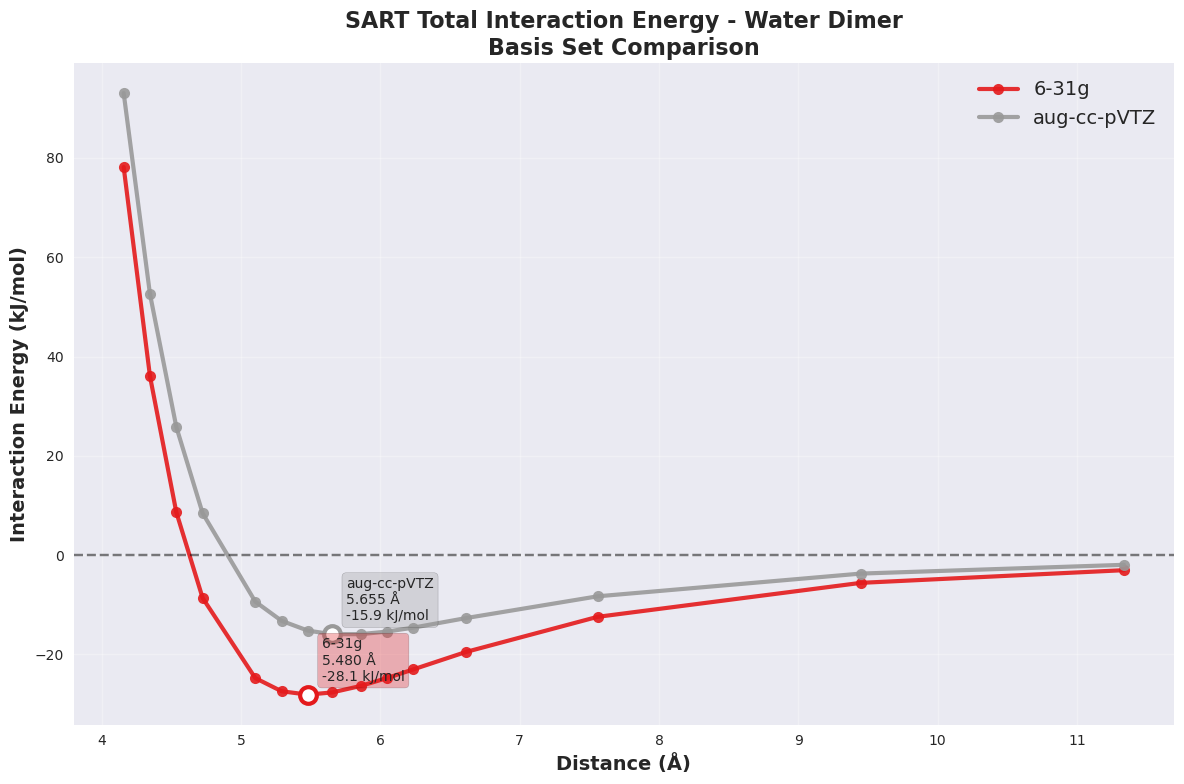

In [6]:
# Original plotting function (updated to use dictionary)
def plot_interaction_energy(data_dict, energy_unit='kJ/mol', figsize=(12, 8)):
    """
    Plot total interaction energy vs distance for different basis sets.
    
    Parameters:
    data_dict: dict, dictionary with basis set names as keys and DataFrames as values
    energy_unit: str, unit for energy conversion
    figsize: tuple, figure size
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    colors = plt.cm.Set1(np.linspace(0, 1, len(data_dict)))
    
    for i, (basis_name, df) in enumerate(data_dict.items()):
        energy_converted = convert_energy(df['E_int'], energy_unit)
        ax.plot(df['Distance'], energy_converted, 'o-', label=basis_name, 
               linewidth=3, markersize=8, color=colors[i], alpha=0.9)
    
    ax.set_xlabel('Distance (Å)', fontweight='bold')
    ax.set_ylabel(f'Interaction Energy ({energy_unit})', fontweight='bold')
    ax.set_title('SART Total Interaction Energy - Water Dimer\nBasis Set Comparison', 
                fontweight='bold', fontsize=16)
    ax.legend(fontsize=14)
    ax.grid(True, alpha=0.3)
    
    # Add horizontal line at zero
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    # Mark equilibrium points
    for i, (basis_name, df) in enumerate(data_dict.items()):
        eq_idx = df['E_int'].idxmin()
        eq_dist = df.loc[eq_idx, 'Distance']
        eq_energy = convert_energy(df.loc[eq_idx, 'E_int'], energy_unit)
        ax.plot(eq_dist, eq_energy, 'o', markersize=12, color=colors[i], 
               markerfacecolor='white', markeredgewidth=3)
        ax.annotate(f'{basis_name}\n{eq_dist:.3f} Å\n{eq_energy:.1f} {energy_unit}', 
                   xy=(eq_dist, eq_energy), xytext=(10, 10), 
                   textcoords='offset points', fontsize=10,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i], alpha=0.3))
    
    plt.tight_layout()
    return fig, ax

# Plot total interaction energy comparison
fig, ax = plot_interaction_energy(data_dict, energy_unit='kJ/mol')
plt.show()

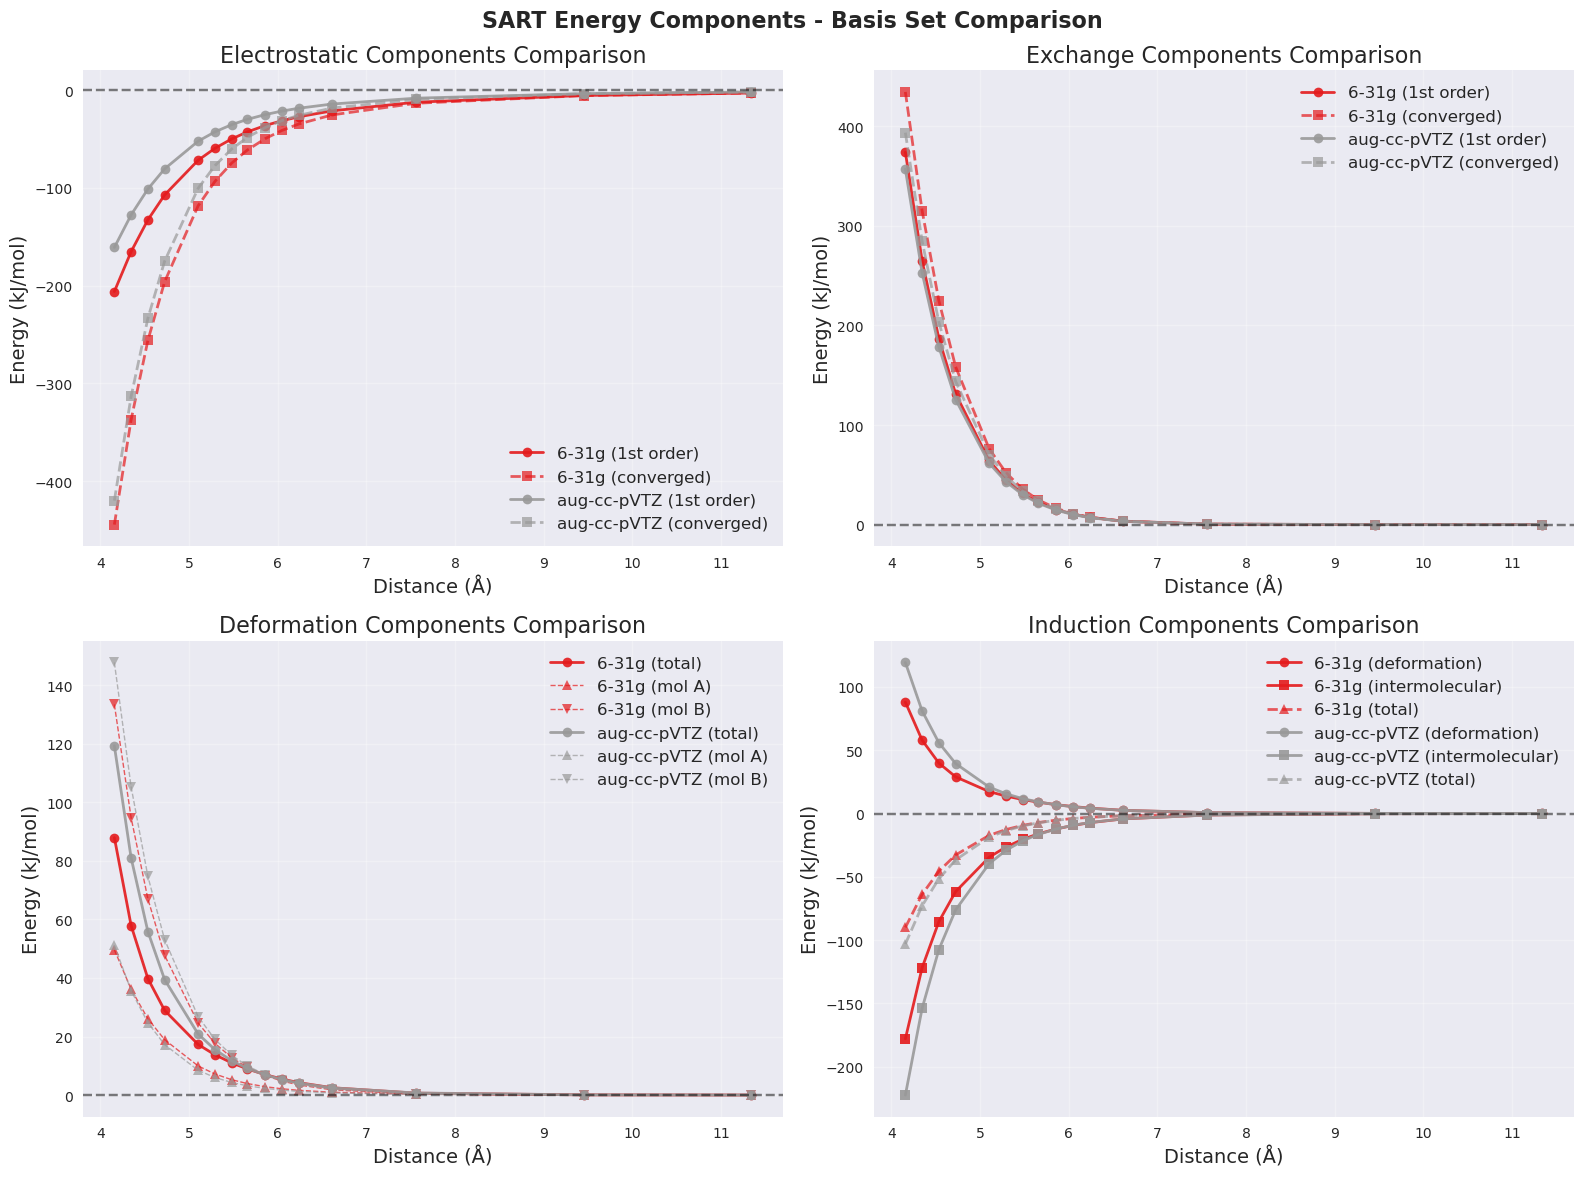

In [7]:
# Energy components comparison function (with improved visibility)
def plot_energy_components_comparison(data_dict, energy_unit='kJ/mol', figsize=(16, 12)):
    """
    Plot energy components comparison between different basis sets.
    
    Parameters:
    data_dict: dict, dictionary with basis set names as keys and DataFrames as values
    energy_unit: str, unit for energy conversion
    figsize: tuple, figure size
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
    
    colors = plt.cm.Set1(np.linspace(0, 1, len(data_dict)))
    
    for i, (basis_name, df) in enumerate(data_dict.items()):
        color = colors[i]
        
        # Plot 1: Electrostatic components
        ax1.plot(df['Distance'], convert_energy(df['E1_elst'], energy_unit), 'o-', 
                label=f'{basis_name} (1st order)', linewidth=2, color=color, alpha=0.9)
        ax1.plot(df['Distance'], convert_energy(df['E_elst'], energy_unit), 's--', 
                label=f'{basis_name} (converged)', linewidth=2, color=color, alpha=0.7)
    
    ax1.set_xlabel('Distance (Å)')
    ax1.set_ylabel(f'Energy ({energy_unit})')
    ax1.set_title('Electrostatic Components Comparison')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    for i, (basis_name, df) in enumerate(data_dict.items()):
        color = colors[i]
        
        # Plot 2: Exchange components
        ax2.plot(df['Distance'], convert_energy(df['E1_exch'], energy_unit), 'o-', 
                label=f'{basis_name} (1st order)', linewidth=2, color=color, alpha=0.9)
        ax2.plot(df['Distance'], convert_energy(df['E_exch'], energy_unit), 's--', 
                label=f'{basis_name} (converged)', linewidth=2, color=color, alpha=0.7)
    
    ax2.set_xlabel('Distance (Å)')
    ax2.set_ylabel(f'Energy ({energy_unit})')
    ax2.set_title('Exchange Components Comparison')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    for i, (basis_name, df) in enumerate(data_dict.items()):
        color = colors[i]
        
        # Plot 3: Deformation components
        ax3.plot(df['Distance'], convert_energy(df['E_def_tot'], energy_unit), 'o-', 
                label=f'{basis_name} (total)', linewidth=2, color=color, alpha=0.9)
        ax3.plot(df['Distance'], convert_energy(df['dEA'], energy_unit), '^--', 
                label=f'{basis_name} (mol A)', linewidth=1, color=color, alpha=0.7)
        ax3.plot(df['Distance'], convert_energy(df['dEB'], energy_unit), 'v--', 
                label=f'{basis_name} (mol B)', linewidth=1, color=color, alpha=0.7)
    
    ax3.set_xlabel('Distance (Å)')
    ax3.set_ylabel(f'Energy ({energy_unit})')
    ax3.set_title('Deformation Components Comparison')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    for i, (basis_name, df) in enumerate(data_dict.items()):
        color = colors[i]
        
        # Plot 4: Induction components
        ax4.plot(df['Distance'], convert_energy(df['E_def_tot'], energy_unit), 'o-', 
                label=f'{basis_name} (deformation)', linewidth=2, color=color, alpha=0.9)
        ax4.plot(df['Distance'], convert_energy(df['E_ind_inter'], energy_unit), 's-', 
                label=f'{basis_name} (intermolecular)', linewidth=2, color=color, alpha=0.9)
        ax4.plot(df['Distance'], convert_energy(df['E_ind_tot'], energy_unit), '^--', 
                label=f'{basis_name} (total)', linewidth=2, color=color, alpha=0.7)
    
    ax4.set_xlabel('Distance (Å)')
    ax4.set_ylabel(f'Energy ({energy_unit})')
    ax4.set_title('Induction Components Comparison')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    plt.suptitle('SART Energy Components - Basis Set Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout()
    return fig

# Plot energy components comparison
fig = plot_energy_components_comparison(data_dict, energy_unit='kJ/mol')
plt.show()

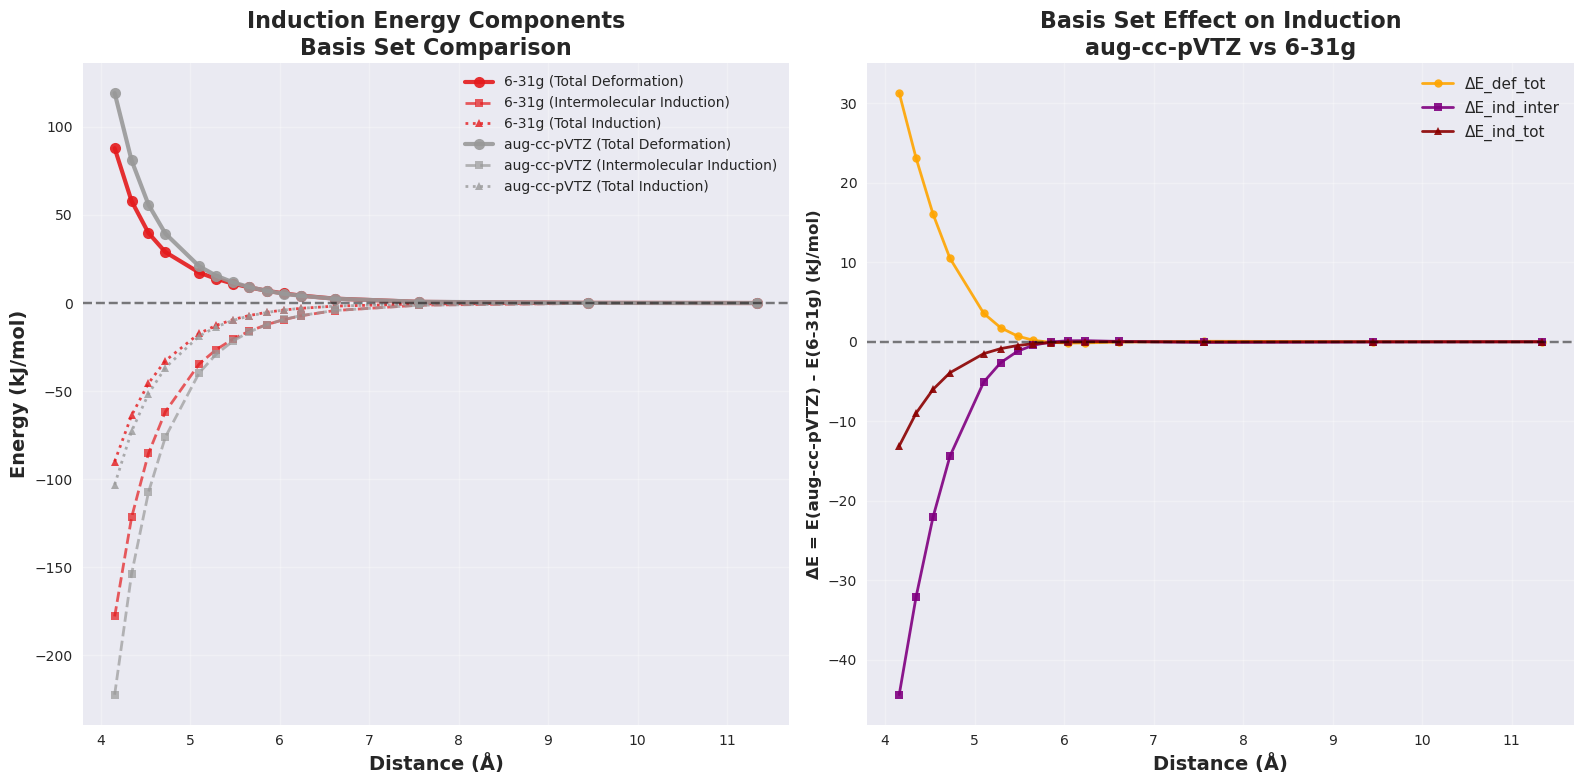

In [8]:
# Induction with deformation comparison function (with improved visibility)
def plot_induction_with_deformation_comparison(data_dict, energy_unit='kJ/mol', figsize=(16, 8)):
    """
    Plot induction energy components including deformation for multiple basis sets.
    
    Parameters:
    data_dict: dict, dictionary with basis set names as keys and DataFrames as values
    energy_unit: str, unit for energy conversion
    figsize: tuple, figure size
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    colors = plt.cm.Set1(np.linspace(0, 1, len(data_dict)))
    
    # Plot 1: Induction components comparison
    for i, (basis_name, df) in enumerate(data_dict.items()):
        color = colors[i]
        
        ax1.plot(df['Distance'], convert_energy(df['E_def_tot'], energy_unit), 'o-', 
                linewidth=3, markersize=8, label=f'{basis_name} (Total Deformation)', 
                color=color, alpha=0.9)
        ax1.plot(df['Distance'], convert_energy(df['E_ind_inter'], energy_unit), 's--', 
                linewidth=2, markersize=6, label=f'{basis_name} (Intermolecular Induction)', 
                color=color, alpha=0.7)
        ax1.plot(df['Distance'], convert_energy(df['E_ind_tot'], energy_unit), '^:', 
                linewidth=2, markersize=6, label=f'{basis_name} (Total Induction)', 
                color=color, alpha=0.8)
    
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax1.set_xlabel('Distance (Å)', fontsize=14, fontweight='bold')
    ax1.set_ylabel(f'Energy ({energy_unit})', fontsize=14, fontweight='bold')
    ax1.set_title('Induction Energy Components\nBasis Set Comparison', 
                  fontsize=16, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Basis set differences in key components
    if len(data_dict) == 2:
        basis_names = list(data_dict.keys())
        df1, df2 = data_dict[basis_names[0]], data_dict[basis_names[1]]
        
        # Calculate differences (basis2 - basis1)
        diff_def = convert_energy(df2['E_def_tot'] - df1['E_def_tot'], energy_unit)
        diff_ind_inter = convert_energy(df2['E_ind_inter'] - df1['E_ind_inter'], energy_unit)
        diff_ind_tot = convert_energy(df2['E_ind_tot'] - df1['E_ind_tot'], energy_unit)
        
        ax2.plot(df1['Distance'], diff_def, 'o-', linewidth=2, markersize=6, 
                label='ΔE_def_tot', color='orange', alpha=0.9)
        ax2.plot(df1['Distance'], diff_ind_inter, 's-', linewidth=2, markersize=6, 
                label='ΔE_ind_inter', color='purple', alpha=0.9)
        ax2.plot(df1['Distance'], diff_ind_tot, '^-', linewidth=2, markersize=6, 
                label='ΔE_ind_tot', color='darkred', alpha=0.9)
        
        ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax2.set_xlabel('Distance (Å)', fontsize=14, fontweight='bold')
        ax2.set_ylabel(f'ΔE = E({basis_names[1]}) - E({basis_names[0]}) ({energy_unit})', 
                      fontsize=12, fontweight='bold')
        ax2.set_title(f'Basis Set Effect on Induction\n{basis_names[1]} vs {basis_names[0]}', 
                      fontsize=16, fontweight='bold')
        ax2.legend(fontsize=11)
        ax2.grid(True, alpha=0.3)
    else:
        # If more than 2 basis sets, show deformation breakdown for first basis set
        first_basis = list(data_dict.keys())[0]
        df = data_dict[first_basis]
        
        ax2.plot(df['Distance'], convert_energy(df['dEA'], energy_unit), 'o-', 
                linewidth=2, markersize=6, label='Deformation A (dEA)', color='blue', alpha=0.9)
        ax2.plot(df['Distance'], convert_energy(df['dEB'], energy_unit), 's-', 
                linewidth=2, markersize=6, label='Deformation B (dEB)', color='green', alpha=0.9)
        ax2.plot(df['Distance'], convert_energy(df['E_LM'], energy_unit), '^-', 
                linewidth=2, markersize=6, label='Landshoff-Murrell (E_LM)', color='red', alpha=0.9)
        ax2.plot(df['Distance'], convert_energy(df['E_def_tot'], energy_unit), 'd-', 
                linewidth=3, markersize=8, label='Total Deformation', color='black', alpha=0.9)
        
        ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax2.set_xlabel('Distance (Å)', fontsize=14, fontweight='bold')
        ax2.set_ylabel(f'Energy ({energy_unit})', fontsize=14, fontweight='bold')
        ax2.set_title(f'Deformation Energy Breakdown\n{first_basis} Basis Set', 
                      fontsize=16, fontweight='bold')
        ax2.legend(fontsize=11)
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Plot induction with deformation comparison
fig = plot_induction_with_deformation_comparison(data_dict, energy_unit='kJ/mol')
plt.show()

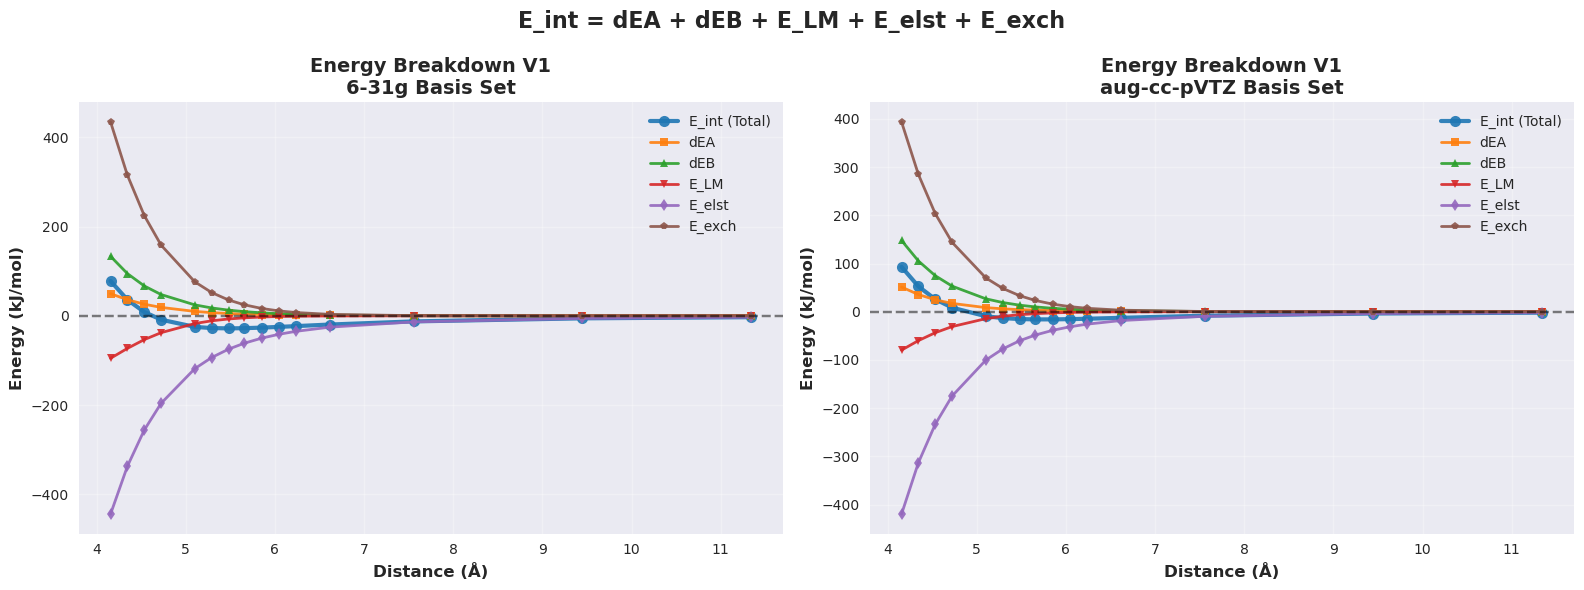

In [9]:
# NEW: Simplified Energy Breakdown V1 - E_int = dEA + dEB + E_LM + E_elst + E_exch
def plot_energy_breakdown_v1_simple(data_dict, energy_unit='kJ/mol', figsize=(16, 6)):
    """
    Plot energy breakdown V1: E_int = dEA + dEB + E_LM + E_elst + E_exch
    Creates separate plots for each basis set.
    
    Parameters:
    data_dict: dict, dictionary with basis set names as keys and DataFrames as values
    energy_unit: str, unit for energy conversion
    figsize: tuple, figure size
    """
    n_basis = len(data_dict)
    fig, axes = plt.subplots(1, n_basis, figsize=figsize)
    
    if n_basis == 1:
        axes = [axes]
    
    # Define colors for components (consistent across plots)
    component_colors = {
        'E_int': '#1f77b4',      # blue
        'dEA': '#ff7f0e',        # orange  
        'dEB': '#2ca02c',        # green
        'E_LM': '#d62728',       # red
        'E_elst': '#9467bd',     # purple
        'E_exch': '#8c564b'      # brown
    }
    
    for i, (basis_name, df) in enumerate(data_dict.items()):
        ax = axes[i]
        
        # Plot each component
        ax.plot(df['Distance'], convert_energy(df['E_int'], energy_unit), 'o-', 
                linewidth=3, markersize=8, label='E_int (Total)', 
                color=component_colors['E_int'], alpha=0.9)
        
        ax.plot(df['Distance'], convert_energy(df['dEA'], energy_unit), 's-', 
                linewidth=2, markersize=6, label='dEA', 
                color=component_colors['dEA'], alpha=0.9)
        
        ax.plot(df['Distance'], convert_energy(df['dEB'], energy_unit), '^-', 
                linewidth=2, markersize=6, label='dEB', 
                color=component_colors['dEB'], alpha=0.9)
        
        ax.plot(df['Distance'], convert_energy(df['E_LM'], energy_unit), 'v-', 
                linewidth=2, markersize=6, label='E_LM', 
                color=component_colors['E_LM'], alpha=0.9)
        
        ax.plot(df['Distance'], convert_energy(df['E_elst'], energy_unit), 'd-', 
                linewidth=2, markersize=6, label='E_elst', 
                color=component_colors['E_elst'], alpha=0.9)
        
        ax.plot(df['Distance'], convert_energy(df['E_exch'], energy_unit), 'p-', 
                linewidth=2, markersize=6, label='E_exch', 
                color=component_colors['E_exch'], alpha=0.9)
        
        ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax.set_xlabel('Distance (Å)', fontsize=12, fontweight='bold')
        ax.set_ylabel(f'Energy ({energy_unit})', fontsize=12, fontweight='bold')
        ax.set_title(f'Energy Breakdown V1\n{basis_name} Basis Set', 
                     fontsize=14, fontweight='bold')
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('E_int = dEA + dEB + E_LM + E_elst + E_exch', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    return fig

# Plot energy breakdown V1
fig = plot_energy_breakdown_v1_simple(data_dict, energy_unit='kJ/mol')
plt.show()

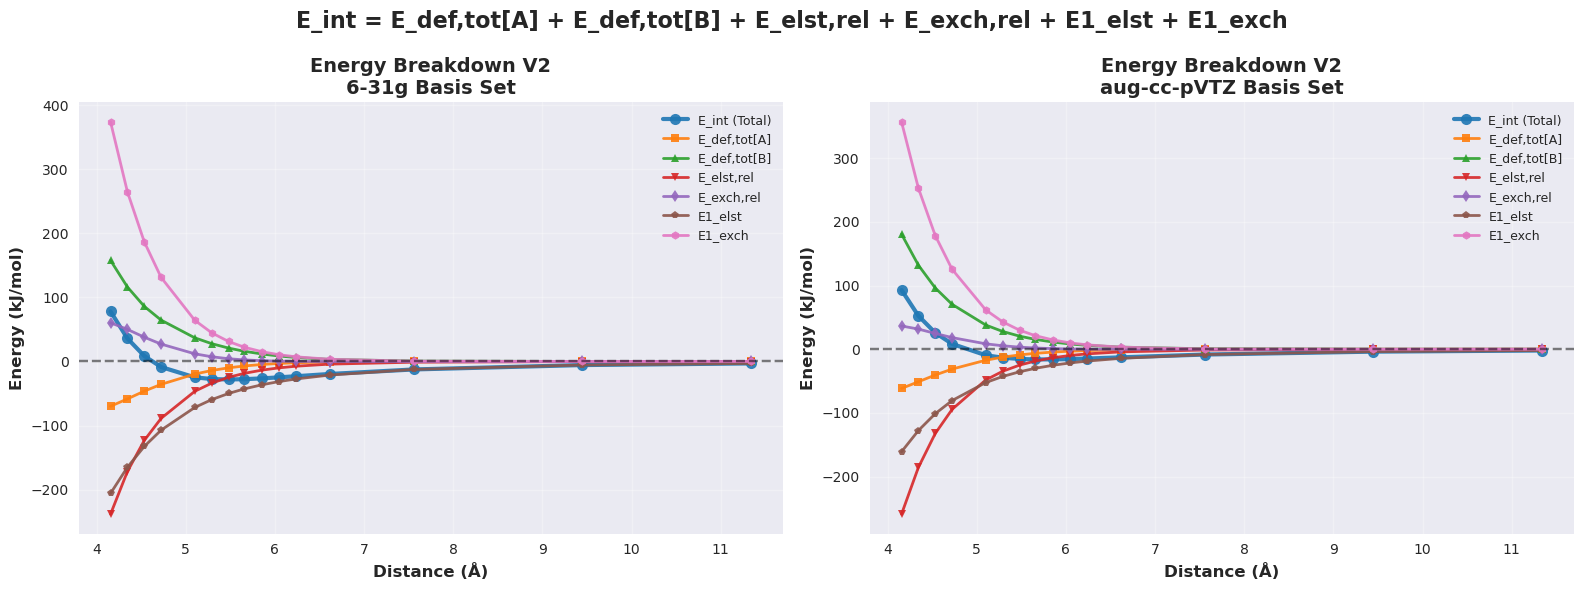

In [10]:
# NEW: Simplified Energy Breakdown V2 - E_int = E_def,tot[A] + E_def,tot[B] + E_elst,rel + E_exch,rel + E1_elst + E1_exch
def plot_energy_breakdown_v2_simple(data_dict, energy_unit='kJ/mol', figsize=(16, 6)):
    """
    Plot energy breakdown V2: E_int = E_def,tot[A] + E_def,tot[B] + E_elst,rel + E_exch,rel + E1_elst + E1_exch
    Creates separate plots for each basis set.
    
    Parameters:
    data_dict: dict, dictionary with basis set names as keys and DataFrames as values
    energy_unit: str, unit for energy conversion
    figsize: tuple, figure size
    """
    n_basis = len(data_dict)
    fig, axes = plt.subplots(1, n_basis, figsize=figsize)
    
    if n_basis == 1:
        axes = [axes]
    
    # Define colors for components
    component_colors = {
        'E_int': '#1f77b4',           # blue
        'E_def_tot[A]': '#ff7f0e',    # orange  
        'E_def_tot[B]': '#2ca02c',    # green
        'E_elst_rel': '#d62728',      # red
        'E_exch_rel': '#9467bd',      # purple
        'E1_elst': '#8c564b',         # brown
        'E1_exch': '#e377c2'          # pink
    }
    
    for i, (basis_name, df) in enumerate(data_dict.items()):
        ax = axes[i]
        
        # Calculate derived quantities
        df_calc = df.copy()
        df_calc['E_elst_rel'] = df_calc['E_elst'] - df_calc['E1_elst']
        df_calc['E_exch_rel'] = df_calc['E_exch'] - df_calc['E1_exch']
        
        # Plot each component
        ax.plot(df_calc['Distance'], convert_energy(df_calc['E_int'], energy_unit), 'o-', 
                linewidth=3, markersize=8, label='E_int (Total)', 
                color=component_colors['E_int'], alpha=0.9)
        
        ax.plot(df_calc['Distance'], convert_energy(df_calc['E_def_tot[A]'], energy_unit), 's-', 
                linewidth=2, markersize=6, label='E_def,tot[A]', 
                color=component_colors['E_def_tot[A]'], alpha=0.9)
        
        ax.plot(df_calc['Distance'], convert_energy(df_calc['E_def_tot[B]'], energy_unit), '^-', 
                linewidth=2, markersize=6, label='E_def,tot[B]', 
                color=component_colors['E_def_tot[B]'], alpha=0.9)
        
        ax.plot(df_calc['Distance'], convert_energy(df_calc['E_elst_rel'], energy_unit), 'v-', 
                linewidth=2, markersize=6, label='E_elst,rel', 
                color=component_colors['E_elst_rel'], alpha=0.9)
        
        ax.plot(df_calc['Distance'], convert_energy(df_calc['E_exch_rel'], energy_unit), 'd-', 
                linewidth=2, markersize=6, label='E_exch,rel', 
                color=component_colors['E_exch_rel'], alpha=0.9)
        
        ax.plot(df_calc['Distance'], convert_energy(df_calc['E1_elst'], energy_unit), 'p-', 
                linewidth=2, markersize=6, label='E1_elst', 
                color=component_colors['E1_elst'], alpha=0.9)
        
        ax.plot(df_calc['Distance'], convert_energy(df_calc['E1_exch'], energy_unit), 'h-', 
                linewidth=2, markersize=6, label='E1_exch', 
                color=component_colors['E1_exch'], alpha=0.9)
        
        ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax.set_xlabel('Distance (Å)', fontsize=12, fontweight='bold')
        ax.set_ylabel(f'Energy ({energy_unit})', fontsize=12, fontweight='bold')
        ax.set_title(f'Energy Breakdown V2\n{basis_name} Basis Set', 
                     fontsize=14, fontweight='bold')
        ax.legend(fontsize=9)
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('E_int = E_def,tot[A] + E_def,tot[B] + E_elst,rel + E_exch,rel + E1_elst + E1_exch', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    return fig

# Plot energy breakdown V2
fig = plot_energy_breakdown_v2_simple(data_dict, energy_unit='kJ/mol')
plt.show()

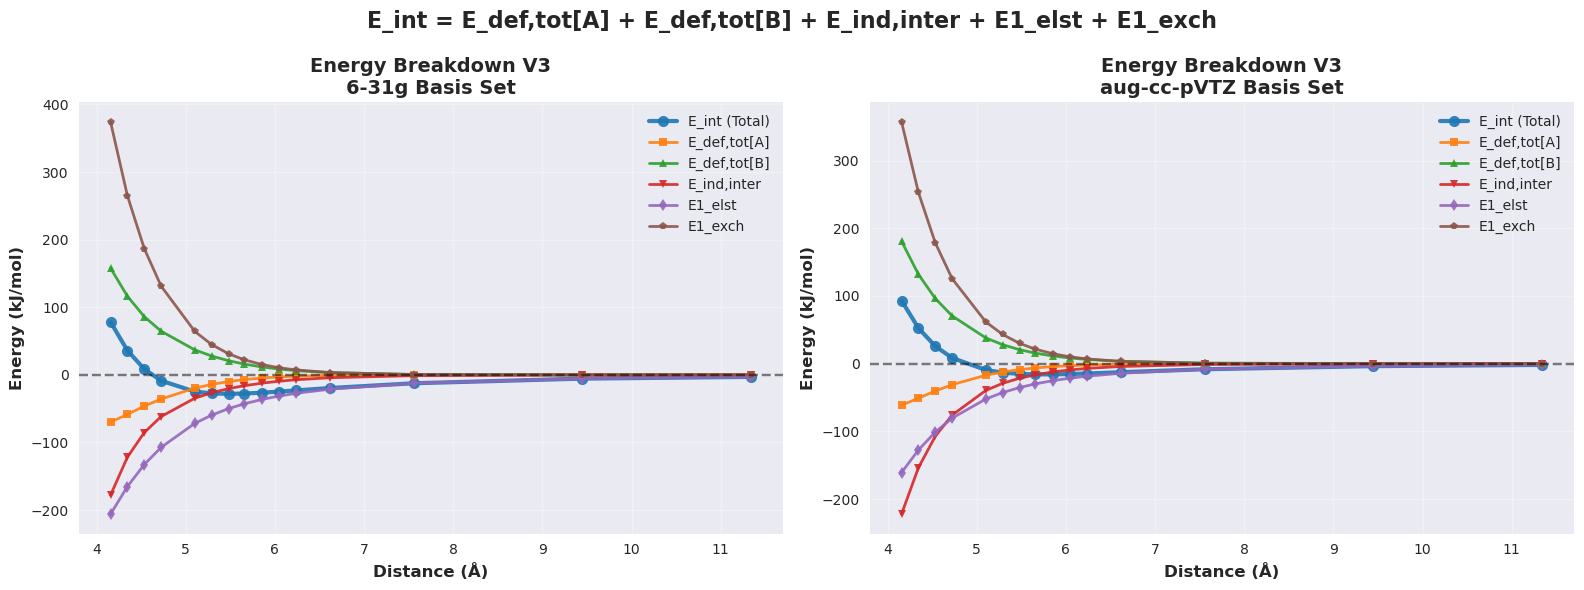

In [11]:
# NEW: Simplified Energy Breakdown V3 - E_int = E_def,tot[A] + E_def,tot[B] + E_ind,inter + E1_elst + E1_exch
def plot_energy_breakdown_v3_simple(data_dict, energy_unit='kJ/mol', figsize=(16, 6)):
    """
    Plot energy breakdown V3: E_int = E_def,tot[A] + E_def,tot[B] + E_ind,inter + E1_elst + E1_exch
    where E_ind,inter = E_elst + E_exch - E1_elst - E1_exch
    Creates separate plots for each basis set.
    
    Parameters:
    data_dict: dict, dictionary with basis set names as keys and DataFrames as values
    energy_unit: str, unit for energy conversion
    figsize: tuple, figure size
    """
    n_basis = len(data_dict)
    fig, axes = plt.subplots(1, n_basis, figsize=figsize)
    
    if n_basis == 1:
        axes = [axes]
    
    # Define colors for components
    component_colors = {
        'E_int': '#1f77b4',           # blue
        'E_def_tot[A]': '#ff7f0e',    # orange  
        'E_def_tot[B]': '#2ca02c',    # green
        'E_ind_inter': '#d62728',     # red
        'E1_elst': '#9467bd',         # purple
        'E1_exch': '#8c564b'          # brown
    }
    
    for i, (basis_name, df) in enumerate(data_dict.items()):
        ax = axes[i]
        
        # Calculate derived quantities
        df_calc = df.copy()
        df_calc['E_ind_inter'] = df_calc['E_elst'] + df_calc['E_exch'] - df_calc['E1_elst'] - df_calc['E1_exch']
        
        # Plot each component
        ax.plot(df_calc['Distance'], convert_energy(df_calc['E_int'], energy_unit), 'o-', 
                linewidth=3, markersize=8, label='E_int (Total)', 
                color=component_colors['E_int'], alpha=0.9)
        
        ax.plot(df_calc['Distance'], convert_energy(df_calc['E_def_tot[A]'], energy_unit), 's-', 
                linewidth=2, markersize=6, label='E_def,tot[A]', 
                color=component_colors['E_def_tot[A]'], alpha=0.9)
        
        ax.plot(df_calc['Distance'], convert_energy(df_calc['E_def_tot[B]'], energy_unit), '^-', 
                linewidth=2, markersize=6, label='E_def,tot[B]', 
                color=component_colors['E_def_tot[B]'], alpha=0.9)
        
        ax.plot(df_calc['Distance'], convert_energy(df_calc['E_ind_inter'], energy_unit), 'v-', 
                linewidth=2, markersize=6, label='E_ind,inter', 
                color=component_colors['E_ind_inter'], alpha=0.9)
        
        ax.plot(df_calc['Distance'], convert_energy(df_calc['E1_elst'], energy_unit), 'd-', 
                linewidth=2, markersize=6, label='E1_elst', 
                color=component_colors['E1_elst'], alpha=0.9)
        
        ax.plot(df_calc['Distance'], convert_energy(df_calc['E1_exch'], energy_unit), 'p-', 
                linewidth=2, markersize=6, label='E1_exch', 
                color=component_colors['E1_exch'], alpha=0.9)
        
        ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax.set_xlabel('Distance (Å)', fontsize=12, fontweight='bold')
        ax.set_ylabel(f'Energy ({energy_unit})', fontsize=12, fontweight='bold')
        ax.set_title(f'Energy Breakdown V3\n{basis_name} Basis Set', 
                     fontsize=14, fontweight='bold')
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('E_int = E_def,tot[A] + E_def,tot[B] + E_ind,inter + E1_elst + E1_exch', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    return fig

# Plot energy breakdown V3
fig = plot_energy_breakdown_v3_simple(data_dict, energy_unit='kJ/mol')
plt.show()

Plotting key components in kJ/mol:


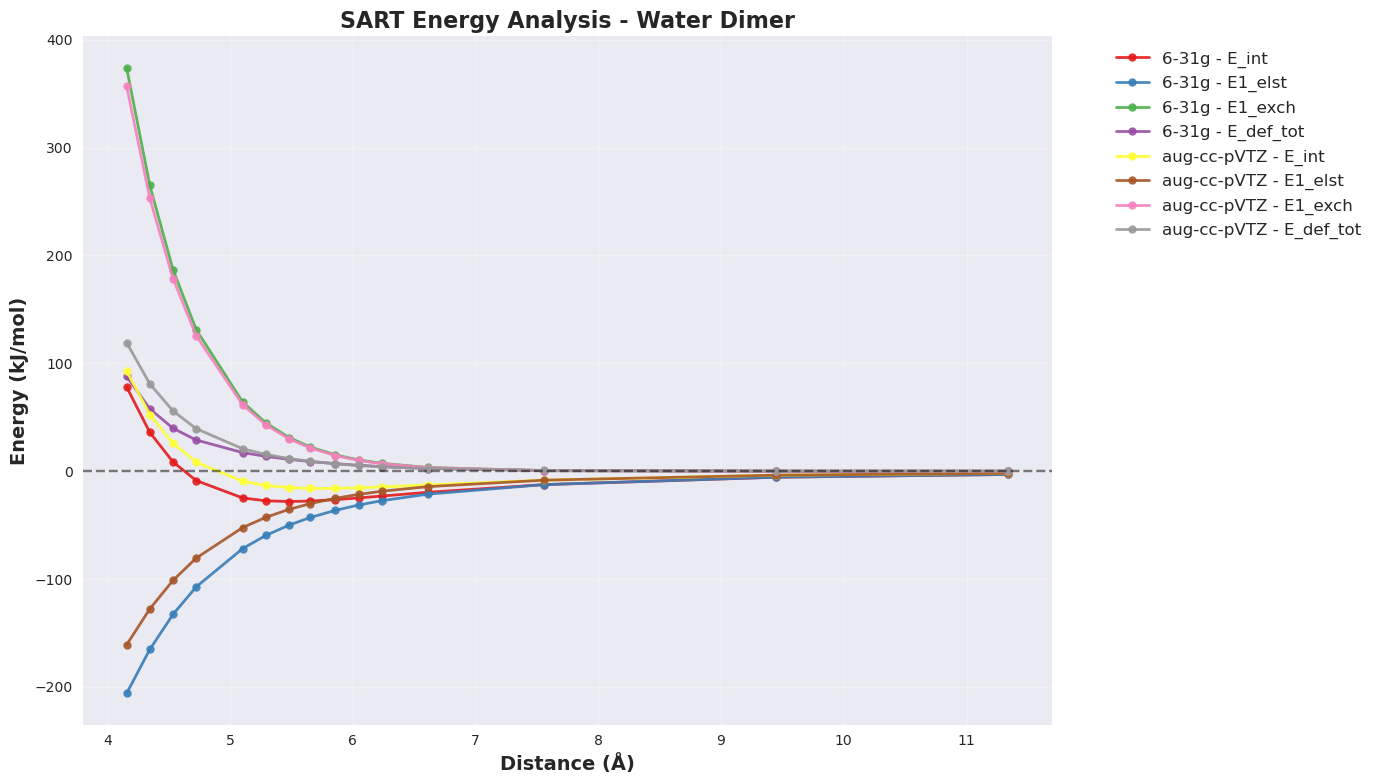

In [12]:
# Interactive plotting function (updated for dictionary input)
def interactive_plot(data_dict, energy_columns=None, energy_unit='kJ/mol', figsize=(14, 8)):
    """
    Create interactive plots with customizable energy unit and components.
    
    Parameters:
    data_dict: dict, dictionary with basis set names as keys and DataFrames as values
    energy_columns: list, list of energy columns to plot (if None, plots total interaction)
    energy_unit: str, unit for energy conversion
    figsize: tuple, figure size
    """
    if energy_columns is None:
        energy_columns = ['E_int']
    
    fig, ax = plt.subplots(figsize=figsize)
    
    colors = plt.cm.Set1(np.linspace(0, 1, len(data_dict) * len(energy_columns)))
    color_idx = 0
    
    for basis_name, df in data_dict.items():
        for col in energy_columns:
            if col in df.columns:
                energy_converted = convert_energy(df[col], energy_unit)
                label = f'{basis_name} - {col}'
                ax.plot(df['Distance'], energy_converted, 'o-', 
                       label=label, linewidth=2, markersize=6, color=colors[color_idx], alpha=0.9)
                color_idx += 1
    
    ax.set_xlabel('Distance (Å)', fontweight='bold')
    ax.set_ylabel(f'Energy ({energy_unit})', fontweight='bold')
    ax.set_title('SART Energy Analysis - Water Dimer', fontweight='bold', fontsize=16)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    return fig, ax

# Example: Plot multiple energy components
print("Plotting key components in kJ/mol:")
fig, ax = interactive_plot(data_dict, ['E_int', 'E1_elst', 'E1_exch', 'E_def_tot'], 'kJ/mol')
plt.show()

In [13]:
# Summary statistics and analysis (updated for comparison)
def analyze_interaction_energy_comparison(data_dict):
    """
    Analyze and compare interaction energy data between basis sets.
    
    Parameters:
    data_dict: dict, dictionary with basis set names as keys and DataFrames as values
    """
    print(f"\n{'='*70}")
    print(f"SART ANALYSIS COMPARISON - WATER DIMER")
    print(f"{'='*70}")
    
    equilibrium_data = {}
    
    for basis_name, df in data_dict.items():
        print(f"\n--- {basis_name} BASIS SET ---")
        print(f"Distance range: {df['Distance'].min():.3f} - {df['Distance'].max():.3f} Å")
        
        # Find minimum interaction energy (most stable configuration)
        min_idx = df['E_int'].idxmin()
        min_energy_kj = convert_energy(df.loc[min_idx, 'E_int'], 'kJ/mol')
        min_distance = df.loc[min_idx, 'Distance']
        
        equilibrium_data[basis_name] = {
            'distance': min_distance,
            'energy': min_energy_kj,
            'energy_hartree': df.loc[min_idx, 'E_int']
        }
        
        print(f"Equilibrium distance: {min_distance:.3f} Å")
        print(f"Interaction energy at equilibrium: {min_energy_kj:.3f} kJ/mol")
        
        # Component analysis at minimum
        print(f"\nEnergy components at equilibrium ({min_distance:.3f} Å):")
        components = ['E1_elst', 'E1_exch', 'E_def_tot', 'E_ind_tot']
        for comp in components:
            if comp in df.columns:
                energy_kj = convert_energy(df.loc[min_idx, comp], 'kJ/mol')
                percentage = (energy_kj / min_energy_kj) * 100 if min_energy_kj != 0 else 0
                print(f"  {comp}: {energy_kj:.3f} kJ/mol ({percentage:.1f}%)")
    
    # Comparison between basis sets
    if len(data_dict) == 2:
        basis_names = list(equilibrium_data.keys())
        basis1, basis2 = basis_names[0], basis_names[1]
        
        print(f"\n{'='*70}")
        print(f"BASIS SET COMPARISON: {basis2} vs {basis1}")
        print(f"{'='*70}")
        
        dist_diff = equilibrium_data[basis2]['distance'] - equilibrium_data[basis1]['distance']
        energy_diff = equilibrium_data[basis2]['energy'] - equilibrium_data[basis1]['energy']
        
        print(f"Equilibrium distance difference: {dist_diff:.3f} Å")
        print(f"Binding energy difference: {energy_diff:.3f} kJ/mol")
        
        if abs(energy_diff) > 0.1:
            rel_diff = abs(energy_diff) / abs(equilibrium_data[basis1]['energy']) * 100
            print(f"Relative difference: {rel_diff:.1f}%")
            
            if energy_diff > 0:
                print(f"→ {basis2} predicts weaker binding than {basis1}")
            else:
                print(f"→ {basis2} predicts stronger binding than {basis1}")
        else:
            print(f"→ Very similar binding energies between basis sets")

# Analyze both datasets
analyze_interaction_energy_comparison(data_dict)


SART ANALYSIS COMPARISON - WATER DIMER

--- 6-31g BASIS SET ---
Distance range: 4.157 - 11.338 Å
Equilibrium distance: 5.480 Å
Interaction energy at equilibrium: -28.095 kJ/mol

Energy components at equilibrium (5.480 Å):
  E1_elst: -49.961 kJ/mol (177.8%)
  E1_exch: 31.242 kJ/mol (-111.2%)
  E_def_tot: 11.031 kJ/mol (-39.3%)
  E_ind_tot: -9.375 kJ/mol (33.4%)

--- aug-cc-pVTZ BASIS SET ---
Distance range: 4.157 - 11.338 Å
Equilibrium distance: 5.655 Å
Interaction energy at equilibrium: -15.925 kJ/mol

Energy components at equilibrium (5.655 Å):
  E1_elst: -29.997 kJ/mol (188.4%)
  E1_exch: 21.459 kJ/mol (-134.7%)
  E_def_tot: 9.154 kJ/mol (-57.5%)
  E_ind_tot: -7.388 kJ/mol (46.4%)

BASIS SET COMPARISON: aug-cc-pVTZ vs 6-31g
Equilibrium distance difference: 0.175 Å
Binding energy difference: 12.169 kJ/mol
Relative difference: 43.3%
→ aug-cc-pVTZ predicts weaker binding than 6-31g


In [14]:
# Save plots function (updated)
def save_all_plots(data_dict, output_dir='sart_plots', energy_unit='kJ/mol'):
    """
    Save all generated plots to files.
    
    Parameters:
    data_dict: dict, dictionary with basis set names as keys and DataFrames as values
    output_dir: str, directory to save plots
    energy_unit: str, unit for energy conversion
    """
    import os
    
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    unit_str = energy_unit.replace("/", "_")
    
    # Save interaction energy comparison
    fig, ax = plot_interaction_energy(data_dict, energy_unit)
    fig.savefig(f'{output_dir}/interaction_energy_comparison_{unit_str}.png', 
                dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    # Save energy components comparison
    fig = plot_energy_components_comparison(data_dict, energy_unit)
    fig.savefig(f'{output_dir}/energy_components_comparison_{unit_str}.png', 
                dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    # Save induction with deformation comparison
    fig = plot_induction_with_deformation_comparison(data_dict, energy_unit)
    fig.savefig(f'{output_dir}/induction_deformation_comparison_{unit_str}.png', 
                dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    # Save all simplified energy breakdown versions
    fig = plot_energy_breakdown_v1_simple(data_dict, energy_unit)
    fig.savefig(f'{output_dir}/energy_breakdown_v1_simple_{unit_str}.png', 
                dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    fig = plot_energy_breakdown_v2_simple(data_dict, energy_unit)
    fig.savefig(f'{output_dir}/energy_breakdown_v2_simple_{unit_str}.png', 
                dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    fig = plot_energy_breakdown_v3_simple(data_dict, energy_unit)
    fig.savefig(f'{output_dir}/energy_breakdown_v3_simple_{unit_str}.png', 
                dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    print(f"All plots saved to {output_dir}/")
    print(f"Generated files:")
    for file in os.listdir(output_dir):
        if file.endswith('.png'):
            print(f"  {file}")

# Uncomment the line below to save all plots
# save_all_plots(data_dict, energy_unit='kJ/mol')

## Usage Instructions - Final Version

### 1. Data Loading
The notebook automatically loads SART data from CSV files in the `water_dimer_datas/` directory. Make sure the files are in the correct location:
- `water_dimer_datas/standardized_sart_results_6-31g.csv`
- `water_dimer_datas/standardized_sart_results_aug-cc-pVTZ.csv`

### 2. Visualization Functions

#### **Comparison Functions**
- `plot_interaction_energy(data_dict)`: Compare total interaction energies between basis sets
- `plot_energy_components_comparison(data_dict)`: Detailed comparison of all energy components
- `plot_induction_with_deformation_comparison(data_dict)`: Induction energy comparison with basis set effects

#### **Simplified Energy Breakdown Functions (NEW)**
- `plot_energy_breakdown_v1_simple(data_dict)`: **V1** - E_int = dEA + dEB + E_LM + E_elst + E_exch
- `plot_energy_breakdown_v2_simple(data_dict)`: **V2** - E_int = E_def,tot[A] + E_def,tot[B] + E_elst,rel + E_exch,rel + E1_elst + E1_exch
- `plot_energy_breakdown_v3_simple(data_dict)`: **V3** - E_int = E_def,tot[A] + E_def,tot[B] + E_ind,inter + E1_elst + E1_exch

**Each breakdown function creates 2 separate plots (one for each basis set) for a total of 6 plots.**

#### **Interactive Functions**
- `interactive_plot(data_dict, energy_columns, energy_unit)`: Customizable plots with unit selection

### 3. Energy Units
All functions support multiple energy units (default: **kJ/mol**):
- 'Hartree'
- 'kcal/mol'
- 'kJ/mol' (default)
- 'meV'
- 'mH' (milliHartree)

### 4. Analysis Functions
- `analyze_interaction_energy_comparison(data_dict)`: Comprehensive comparison with statistics
- `save_all_plots(data_dict)`: Export all visualizations as high-resolution PNG files

### 5. Example Usage

```python
# Compare interaction energies
plot_interaction_energy(data_dict, energy_unit='kcal/mol')

# Show simplified energy breakdown V1 (2 separate plots)
plot_energy_breakdown_v1_simple(data_dict, energy_unit='kJ/mol')

# Custom plot with specific components
interactive_plot(data_dict, ['E_int', 'E1_elst', 'E_def_tot'], 'meV')

# Save all plots
save_all_plots(data_dict, output_dir='my_plots', energy_unit='kJ/mol')
```

## Energy Component Definitions

### **Primary Components**
- **E_int**: Total interaction energy
- **E1_elst**: First-order electrostatic energy
- **E1_exch**: First-order exchange energy
- **E_elst**: Converged electrostatic energy
- **E_exch**: Converged exchange energy
- **dEA, dEB**: Deformation energies for molecules A and B
- **E_LM**: Landshoff-Murrell energy

### **Derived Components**
- **E_def_tot**: Total deformation energy (dEA + dEB + E_LM)
- **E_elst_rel**: Electrostatic relaxation (E_elst - E1_elst)
- **E_exch_rel**: Exchange relaxation (E_exch - E1_exch)
- **E_ind_inter**: Intermolecular induction (E_elst_rel + E_exch_rel)
- **E_ind_tot**: Total induction (E_def_tot + E_ind_inter)

### **Energy Breakdown Formulations**

1. **Version 1**: E_int = dEA + dEB + E_LM + E_elst + E_exch
2. **Version 2**: E_int = E_def,tot[A] + E_def,tot[B] + E_elst,rel + E_exch,rel + E1_elst + E1_exch
3. **Version 3**: E_int = E_def,tot[A] + E_def,tot[B] + E_ind,inter + E1_elst + E1_exch

## Updates in This Version

- **✅ Simplified breakdown plots**: Each breakdown now shows separate plots for each basis set (6 total)
- **✅ Improved visibility**: Reduced transparency (alpha=0.9) for better line visibility
- **✅ Clear component visualization**: Each plot shows only E_int and its specific components
- **✅ Consistent color scheme**: Same colors for same components across all plots
- **✅ Enhanced readability**: Larger markers and thicker lines for better visibility
- **✅ Correct file paths**: Updated for `/home/evanich/water_dimer_analysis/` structure